## Convolutional neural network in keras. Fashion MNIST

Objective:
Model and train a convolutional neural network using Keras in order to classify the elements of a dataset correctly.

#### Import libraries.

All the necessary libraries are imported in the next code block.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt

The data is retrived and divided into two, one for training and the other for testing.

In [ ]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


#### Shape of the data.

In this exercise the model's input will keep the 2 dimensional format of the images (28x28) instead of a flatten input. The 60000 and 10000 represent the number of samples in the training and test sets respectively.

In [ ]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The labels of the data consist in ten different numbers that reference cloth items. The following block contains the dictionary of each of the items with their respective number than represents them.

In [ ]:
mnist_classes= {0:"T-shirt/top",
                1:"Trouser",
                2:"Pullover",
                3:"Dress",
                4:"Coat",
                5:"Sandal",
                6:"Shirt",
                7:"Sneaker",
                8:"Bag",
                9:"Ankle boot"}

In the next two code blocks a random sample of the training data set is selected and the image displayed.

In [ ]:
sample = np.random.randint(0, x_train.shape[0])

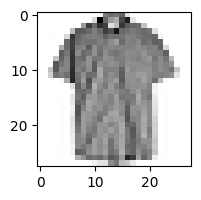

In [ ]:

plt.figure(figsize = (2,2))
mnist_img = x_train[sample]
plt.imshow(mnist_img,cmap="Greys")
ax = plt.gca()


#### Preprocessing the data.

In order for the model to get the most out of the data is important to preprocess it. However, for this exercise only labels will be preprocess(one-hot encoding) and the rest of the data will fed to the model as it is after downloading. The purpose of this is to see if the convolutional model's accuracy improves more than a simple linear model.

A couple of the preprocess techniques than could have been applied are: normalization and data augmentation.

In [ ]:
n_classes=10
keras.utils.to_categorical(y_train, n_classes)
keras.utils.to_categorical(y_test, n_classes)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Model 2

For the model three groups of layers with convolutional layers will be defined and then there will be a flatten layer followed by a dense  and a final dense layer to provide the output's result.

In the first group there is a convolutional layer and a normalization layer for the batch. The second group will be a convolution layer, a max-pooling layer and a normalization layer. The third group is the same as the second.



In [ ]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), padding="same", strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))

### Model's information.

The model's information is displayed in the following code block. The model is not very deep, however it still has a total of 2,957,450 trainable parameters. The model could be more complex. However the model presented here is good enough to surpass a fully-dense model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 256)       0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 256)       1024      
 chNormalization)                                                
                                                        

### Compile and training.

Once the model is defined, it is time to compile and choose the loss function, the optimizer and the metrics that will be used.

Again, for this model, things will be simple:

The sparse categorical crossentropy function to classify the data which has various labels. The optimizer will be one that is commonly used for its good performance and the accuracy metrics to see how well it predicts a correct label

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.3, shuffle=True)

Epoch 1/30
329/329 [==============================] - 29s 44ms/step - loss: 0.5279 - accuracy: 0.8252 - val_loss: 0.3272 - val_accuracy: 0.8809
Epoch 2/30
329/329 [==============================] - 15s 45ms/step - loss: 0.3126 - accuracy: 0.8883 - val_loss: 0.3713 - val_accuracy: 0.8682
Epoch 3/30
329/329 [==============================] - 15s 45ms/step - loss: 0.2630 - accuracy: 0.9051 - val_loss: 0.2475 - val_accuracy: 0.9131
Epoch 4/30
329/329 [==============================] - 14s 43ms/step - loss: 0.2284 - accuracy: 0.9160 - val_loss: 0.2369 - val_accuracy: 0.9189
Epoch 5/30
329/329 [==============================] - 15s 46ms/step - loss: 0.2058 - accuracy: 0.9240 - val_loss: 0.2552 - val_accuracy: 0.9093
Epoch 6/30
329/329 [==============================] - 15s 44ms/step - loss: 0.1916 - accuracy: 0.9285 - val_loss: 0.2303 - val_accuracy: 0.9225
Epoch 7/30
329/329 [==============================] - 16s 48ms/step - loss: 0.1702 - accuracy: 0.9372 - val_loss: 0.2359 - val_accuracy:

# Model's evaluation and prediction exercise.

The model is evaluated with the test set. The last epoch of training returned an accuracy of 93.48% which is

At the end there is a small prediction exercise for one sample.

In [ ]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4633 - accuracy: 0.9263


[0.4632863700389862, 0.9262999892234802]

In [ ]:
sample_test = np.random.randint(0, x_test.shape[0])

In [ ]:
np.shape(x_test[sample_test])

(28, 28)

In [ ]:
np.shape(x_test)

(10000, 28, 28)

In [ ]:
x = x_test[sample_test]

In [ ]:
np.shape(x)

(28, 28)

In [ ]:
x = x_test[sample_test].reshape(1,28,28)

In [ ]:
np.shape(x)

(1, 28, 28)

In [ ]:
result= model.predict(x)

1/1 [==============================] - 0s 186ms/step


In [ ]:
prediction= result.argmax()

In [ ]:
mnist_classes[prediction]

'Shirt'

In [ ]:
print(mnist_classes[y_test[sample_test]])

Shirt


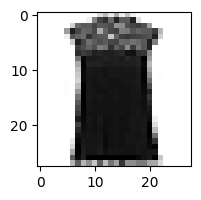

In [ ]:
x_test = x_test.reshape(10000, 28, 28).astype('float32')
plt.figure(figsize = (2,2))
mnist_img = x_test[sample_test]
plt.imshow(mnist_img,cmap="Greys")
ax = plt.gca()

### Conclusion.

The convolution model definitely surpass a full-dense model because it can captures features while maitining the 2 dimensional shape of the image.